In [147]:
from hmmlearn import hmm
import matplotlib.pyplot as plt
import numpy as np

## TASK-3

In [148]:
rolls_data=np.load('rolls.npy')
rolls_length=rolls_data.shape[0]//2
x_train=rolls_data[:rolls_length]
x_val=rolls_data[rolls_length:]

### PART-1

In [149]:
num_fits=50
best_score=best_model=None
fair_prob=np.array([1/6]*6)
np.random.seed(13)
for i in range(num_fits):
  model=hmm.CategoricalHMM(n_components=2,random_state=i,params='t',init_params='')
  random_probs=np.random.dirichlet(np.array([1,1,1,1,1,1]))
  model.emissionprob_=np.array([fair_prob,random_probs])
  model.startprob_=np.array([1.0,0.0])
  model.transmat_=np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
  model.fit(x_train)
  score=model.score(x_val)
  print(f'Model #{i}\tScore: {score}')
  if best_score is None or score > best_score:
    best_model = model
    best_score = score

Model #0	Score: -44793.98673070577
Model #1	Score: -44793.98673070579
Model #2	Score: -44793.98673070579
Model #3	Score: -44793.98656181007
Model #4	Score: -44793.986730707205
Model #5	Score: -44332.944419566855
Model #6	Score: -44793.98673103912
Model #7	Score: -44793.98676770079
Model #8	Score: -43357.857393389604
Model #9	Score: -44811.50475922897
Model #10	Score: -44793.99388536455
Model #11	Score: -44793.98676398804
Model #12	Score: -43839.87132773634
Model #13	Score: -44210.99168917925
Model #14	Score: -44793.986730705765
Model #15	Score: -44793.98673815849
Model #16	Score: -44793.98380675031
Model #17	Score: -44793.98673401656
Model #18	Score: -44634.944068868375
Model #19	Score: -44794.16968700328
Model #20	Score: -44442.703939568906
Model #21	Score: -44793.98681258907
Model #22	Score: -44793.98416934062
Model #23	Score: -44793.98795435218
Model #24	Score: -44793.98673070569
Model #25	Score: -44793.98673070579
Model #26	Score: -44795.39741986762
Model #27	Score: -44316.94241017

In [150]:
print("Best Model :-")
print(f"Emission probabilities: {best_model.emissionprob_}")
print(f"State Transition probabilities: {best_model.transmat_}")
print(f"Best Score: {best_score}")

Best Model :-
Emission probabilities: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.03398302 0.15554746 0.15164388 0.04190794 0.09709583 0.51982188]]
State Transition probabilities: [[0.86022699 0.13977301]
 [0.284152   0.715848  ]]
Best Score: -43294.65791294175


#### Most likely sequence of switching between the fair and loaded die

In [151]:
_,sequence=best_model.decode(x_val)
for a in sequence:
  print(f"{a}->",end="")

0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->1->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->0->0->1->1->1->1->1->1->0->0->0->0->0->0->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->0->0->0->0->0->0->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->0->1->1->1->1->1->1->1->0->0->0->0->0->0->0->0->0->0->0->0->0

#### Plot for generated states

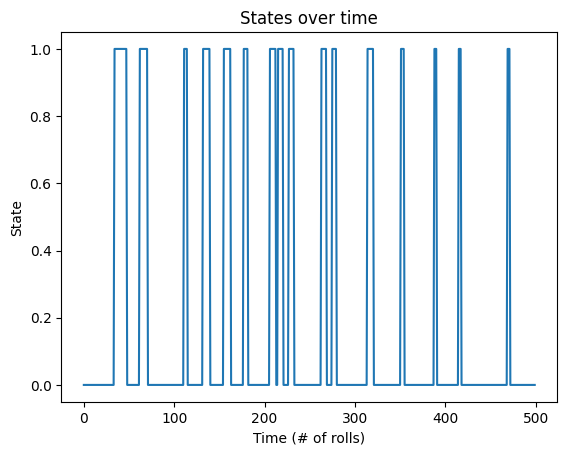

In [152]:
plt.plot(sequence[:500])
plt.title('States over time')
plt.xlabel('Time (# of rolls)')
plt.ylabel('State')
plt.show()

#### This is known as the "DECODING" problem in HMM where we have to estimate the likely sequence of states that resulted in the given observations.

### PART-2

#### How often do you think the casino is switching out the fair die for the loaded one and vice versa?

In [153]:
print(f"State Transition probabilities: {best_model.transmat_}")
count_120=count_021=0
for i in range(len(sequence)-1):
  if sequence[i]==0 and sequence[i+1]==1:
    count_021+=1
  elif sequence[i]==1 and sequence[i+1]==0:
    count_120+=1
print(f"For 25000 validation rolls, Number of times switched from fair to loaded die = {count_021}")
print(f"For 25000 validation rolls, Number of times switched from loaded to fair die = {count_120}")

State Transition probabilities: [[0.86022699 0.13977301]
 [0.284152   0.715848  ]]
For 25000 validation rolls, Number of times switched from fair to loaded die = 665
For 25000 validation rolls, Number of times switched from loaded to fair die = 665


#### This is the "LEARNING" problem in HMM's where we estimate how likely the state transitions occur i.e. estimate the state transition matrix. We use the "DECODING" problem in HMMs to count the frequency of transitions from unfair to fair and fair to unfair dice using the sequence of states obtained using decoding.

### PART-3

#### How do you think the loaded die is biased

In [154]:
print(f"Emission probabilities: {best_model.emissionprob_}")

Emission probabilities: [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
 [0.03398302 0.15554746 0.15164388 0.04190794 0.09709583 0.51982188]]


#### So, we see that for the loaded die (2nd row), probability of different faces showing up is not the same. The probability of face 6 showing up is very high compared to others. So, it is biased.

#### This is called the 'LEARNING' problem in HMM's where we estimate the unknown parameters (which is the emmission's matrix here).

### TASK-4

In [155]:
runs_data=np.load('runs.npy')
runs_data[runs_data==6]=5

In [156]:
num_fits=50
best_score=best_model=None
np.random.seed(13)
for i in range(num_fits):
  model=hmm.CategoricalHMM(n_components=2,random_state=i,params='ste',init_params='s')
  model.emissionprob_=np.array([[0.05, 0.3, 0.4, 0.05, 0.1, 0.1],
                            [0.1, 0.1, 0.05, 0.05, 0.4, 0.3]])
  model.transmat_=np.array([[0.7, 0.3],
                            [0.3, 0.7]])
  model.fit(runs_data)
  score=model.score(runs_data)
  print(f'Model #{i}\tScore: {score}')
  if best_score is None or score > best_score:
    best_model = model
    best_score = score

Model #0	Score: -50985.66897484103
Model #1	Score: -50985.66445522241
Model #2	Score: -50985.66684706465
Model #3	Score: -50985.66568185114
Model #4	Score: -50985.668562551604
Model #5	Score: -50985.6678270924
Model #6	Score: -50985.66705416876
Model #7	Score: -50985.706432258
Model #8	Score: -50985.668161433714
Model #9	Score: -50985.80718753785
Model #10	Score: -50985.666708524324
Model #11	Score: -50985.66768312626
Model #12	Score: -50985.672982393844
Model #13	Score: -50985.66906719209
Model #14	Score: -50985.66603195917
Model #15	Score: -50985.66446696129
Model #16	Score: -50985.67233681152
Model #17	Score: -50985.66626397117
Model #18	Score: -50985.6734816084
Model #19	Score: -50985.67893006093
Model #20	Score: -50985.675896568
Model #21	Score: -50985.692431209936
Model #22	Score: -50985.67517568606
Model #23	Score: -50985.67290670525
Model #24	Score: -50985.66465411865
Model #25	Score: -50985.66472162702
Model #26	Score: -50985.681493725315
Model #27	Score: -50985.674493489634
M

#### Optimal transition, emission and start probability for the HMM model

In [157]:
print("Best Model :-")
print(f"Best Score: {best_score}")
print(f"Emission probabilities: {best_model.emissionprob_}")
print(f"State Transition probabilities: {best_model.transmat_}")
print(f"Start Probabilities : {best_model.startprob_}")

Best Model :-
Best Score: -50985.66445522241
Emission probabilities: [[0.11782943 0.30854378 0.30782533 0.04801802 0.11617651 0.10160694]
 [0.13183223 0.10583964 0.06260701 0.04823417 0.37407479 0.27741216]]
State Transition probabilities: [[0.63628656 0.36371344]
 [0.31799485 0.68200515]]
Start Probabilities : [1.00000000e+00 1.07997784e-10]


#### So, we can see that the state transition probability of switching from Virat to Rohit and Rohit to Virat is near 30% (as given in the problem). Also, the observation probabilities of scoring 1 and 2 is high for Kohli, compared to other runs. For Rohit, 4 and 6 is more probable.

In [158]:
_,seq=best_model.decode(runs_data)
print(seq[0],seq[-1])

0 1


#### So, the first ball was played by Virat and last ball by Rohit.